In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
file_path = '/content/Marvel Vs DC.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
df.head()

,ID,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
0,0,Eternals,NaN,"Action,Adventure,Drama",NaN,NaN,ChloéZhao,"AngelinaJolie,GemmaChan,RichardMadden,BarryKeo...","The saga of the Eternals, a race of immortal b...",NaN,NaN,NaN,NaN,Marvel
1,1,Loki,NaN,"Action,Adventure,Fantasy",NaN,NaN,NaN,"TomHiddleston,OwenWilson,SophiaDiMartino,Richa...",A new Marvel chapter with Loki at its center.,NaN,NaN,NaN,NaN,Marvel
2,2,The Falcon and the Winter Soldier,NaN,"Action,Adventure,Drama",50.0,TV-14,NaN,"AnthonyMackie,SebastianStan,WyattRussell,ErinK...","Following the events of 'Avengers: Endgame,' S...",7.5,NaN,105557.0,NaN,Marvel
3,3,WandaVision,NaN,"Action,Comedy,Drama",350.0,TV-PG,NaN,"ElizabethOlsen,PaulBettany,KathrynHahn,Teyonah...",Blends the style of classic sitcoms with the M...,8.1,NaN,174710.0,NaN,Marvel
4,4,Spider-Man: No Way Home,NaN,"Action,Adventure,Sci-Fi",NaN,NaN,JonWatts,"AngourieRice,TomHolland,Zendaya,MarisaTomei",A continuation of Spider-Man: Far From Home.,NaN,NaN,NaN,NaN,Marvel


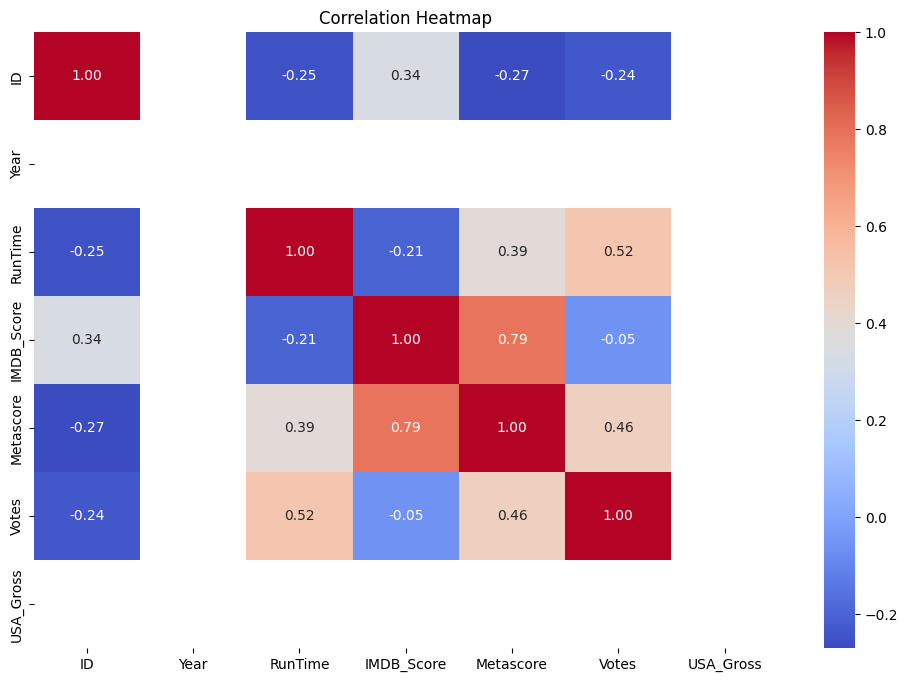

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

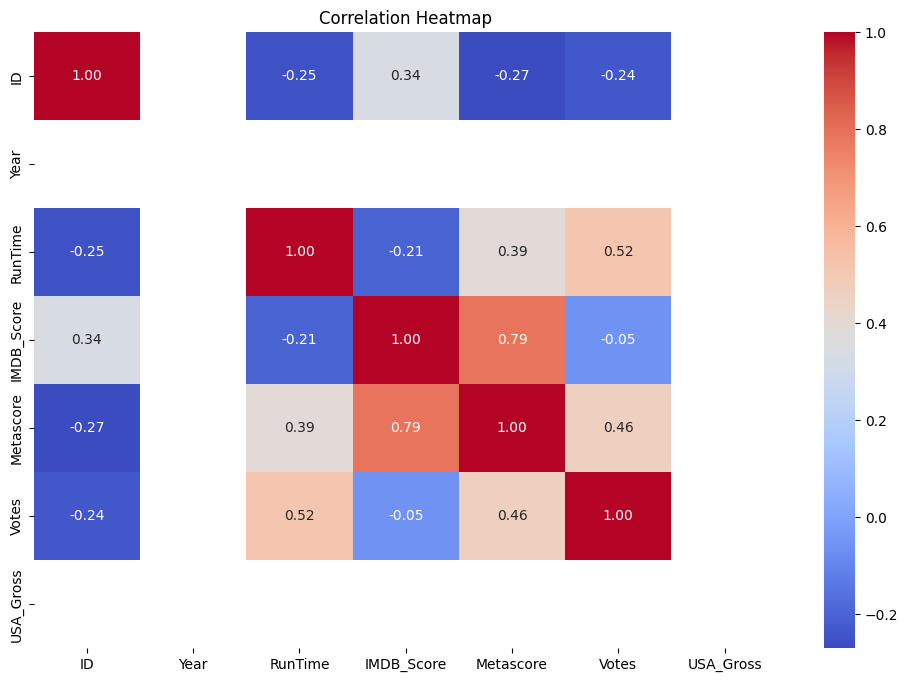

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Prepare the data for prediction
features = ['Year', 'RunTime', 'Votes', 'USA_Gross', 'Metascore']
X = df[features].dropna()
y = df.loc[X.index, 'IMDB_Score']

# Check if we have enough data for training and testing
if len(X) > 0:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse, r2
else:
    print('Not enough data to train the model.')

Not enough data to train the model.


In [ ]:
# Display basic statistics
df.describe()

,ID,Year,RunTime,IMDB_Score,Metascore,Votes,USA_Gross
count,1690.000000,0.0,1407.000000,1486.000000,65.000000,1.486000e+03,0.0
mean,844.500000,NaN,40.988628,7.821467,61.230769,2.462471e+04,NaN
std,488.005294,NaN,31.214098,0.918777,14.387244,1.369651e+05,NaN
min,0.000000,NaN,1.000000,1.100000,27.000000,5.000000e+00,NaN
25%,422.250000,NaN,22.000000,7.300000,53.000000,2.312500e+02,NaN
50%,844.500000,NaN,42.000000,8.000000,64.000000,8.935000e+02,NaN
75%,1266.750000,NaN,43.000000,8.500000,71.000000,2.103000e+03,NaN
max,1689.000000,NaN,527.000000,9.600000,88.000000,2.361064e+06,NaN


This dataset provides a detailed comparison between Marvel and DC movies and TV shows, covering various attributes such as titles, release years, genres, runtimes, age ratings, directors, and main actors. It includes audience reception metrics like IMDb scores, votes, and critic reviews via Metascore, as well as financial data like USA gross earnings. The dataset allows for an in-depth analysis of the differences and similarities between Marvel and DC productions, making it a valuable resource for examining trends in genre, performance, and audience reception within the superhero entertainment industry.